# Gestión Segura de Datos de Clientes

Este notebook implementa un sistema básico de gestión y análisis de datos de clientes, aplicando técnicas de pseudonimización, anonimización y balanceo de datos.


## Objetivo
El proyecto consiste en desarrollar un sistema de gestión y análisis de datos de clientes que implemente técnicas de pseudonimización, anonimización y balanceo de datos para proteger la privacidad de los usuarios y asegurar un análisis equitativo.


## Consignas del Proyecto
1. Cargar los datos de clientes provistos en un archivo CSV.
2. Aplicar técnicas de anonimización al campo `direccion`, `edad` y `salario` para proteger la identidad de los clientes.
3. Aplicar técnicas de pseudonimización al campo `nombre`.
4. Implementar una función de balanceo de datos para asegurar la representación equitativa de diversas categorías en el análisis posterior.
5. Realizar un análisis simple de los datos para identificar tendencias o patrones que podrían ser útiles para decisiones de negocios o marketing.

In [41]:
import pandas as pd
import numpy as np
import uuid
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
ruta = 'C:/Users/Shirley/Python Data Science y Machine Learning/Etica y Privacidad en Data Science/Proyecto/clientes.csv'
df = pd.read_csv(ruta)
df.head(5)

,nombre,direccion,edad,categoria,salario
0,Richard Martin,784 Stevens,62,0,61050
1,James Jones,729 Neruda,65,1,53824
2,Patricia Wilson,935 Dickinson,18,0,60281
3,Elizabeth Robinson,459 Rilke,21,1,42187
4,Charles Brown,823 Ginsberg,21,1,37589


In [17]:
#anonimización de la edad

df['edad'] = (df['edad'] // 10) * 10
df.head(5)

,nombre,direccion,edad,categoria,salario
0,Richard Martin,784 Stevens,60,0,61050
1,James Jones,729 Neruda,60,1,53824
2,Patricia Wilson,935 Dickinson,10,0,60281
3,Elizabeth Robinson,459 Rilke,20,1,42187
4,Charles Brown,823 Ginsberg,20,1,37589


In [19]:
#anonimización de la dirección

df['direccion'] = df['direccion'].apply(lambda x: '****' + x.split(' ',1)[1])
df.head(5)

,nombre,direccion,edad,categoria,salario
0,Richard Martin,****Stevens,60,0,61050
1,James Jones,****Neruda,60,1,53824
2,Patricia Wilson,****Dickinson,10,0,60281
3,Elizabeth Robinson,****Rilke,20,1,42187
4,Charles Brown,****Ginsberg,20,1,37589


In [25]:
#anonimización del salario

ruido = np.random.randint(-500, 500, df.shape[0])
df['salario'] = df['salario'] + ruido
df.head(5)

,nombre,direccion,edad,categoria,salario
0,Richard Martin,****Stevens,60,0,61193
1,James Jones,****Neruda,60,1,54326
2,Patricia Wilson,****Dickinson,10,0,60430
3,Elizabeth Robinson,****Rilke,20,1,41831
4,Charles Brown,****Ginsberg,20,1,37874


In [29]:
#pseudonimización al nombre 

id_pseudo = []

for n in range(len(df)):
    id_pseudo.append(str(uuid.uuid4()))

df['nombre'] = id_pseudo
df.head(5)

,nombre,direccion,edad,categoria,salario
0,2a4fb784-1c43-4098-8d27-c9d3c72cc030,****Stevens,60,0,61193
1,caf25185-9d00-429b-bb2a-778be3feb652,****Neruda,60,1,54326
2,a94f9546-4910-471c-b574-c63eb43a7c69,****Dickinson,10,0,60430
3,1273fa92-fc1c-4c33-913c-bfdbb26efa56,****Rilke,20,1,41831
4,7e6637cd-2f22-489a-b6a4-760048d85b54,****Ginsberg,20,1,37874


In [37]:
agrupados = df.groupby('categoria')

data_balance = pd.DataFrame()

for nombre, grupo in agrupados:
    grupo_balance = resample(grupo,
                            replace=True,
                            n_samples=10,
                            random_state=123)
    data_balance = pd.concat([data_balance, grupo_balance])

data_balance

,nombre,direccion,edad,categoria,salario
158,50a94d73-9d86-4ee5-ae40-5b8f0705f16b,****Rimbaud,50,0,41614
42,f089c8ae-9a7f-4eb4-89e1-451b0d01a92f,****Milton,30,0,59532
194,9ca5869a-991d-4626-900f-2e547eed9188,****Cummings,40,0,50079
133,7b8eadd5-a8ca-4085-8a7d-e1421283c412,****Brodsky,50,0,42412
114,7b4bdb0b-9980-430d-89fa-d7cafd7a3879,****Auden,60,0,53444
177,329363f1-c450-4bb7-ac78-ae9297fe8ce0,****Frost,40,0,51243
83,0d403081-5461-4346-84d8-28806fa78a5f,****Pound,30,0,46161
113,a80d1a76-f741-4e87-8cec-fef52cb105c3,****Bly,60,0,68559
56,85d8ff24-d996-4948-bc93-95c998ad596d,****Hughes,40,0,51884
194,9ca5869a-991d-4626-900f-2e547eed9188,****Cummings,40,0,50079


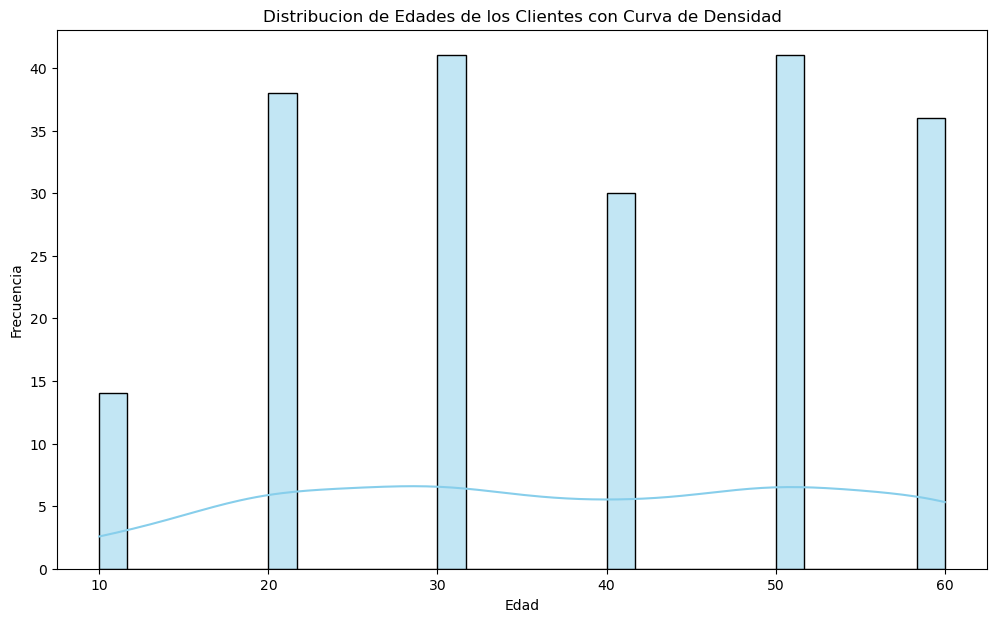

In [47]:
#visualizacion 1:
plt.figure(figsize=(12,7))
ax = sns.histplot(df['edad'],
                  kde=True,
                  color='skyblue',
                  bins=30)
ax.set(title='Distribucion de Edades de los Clientes con Curva de Densidad',
      xlabel='Edad',
      ylabel='Frecuencia');

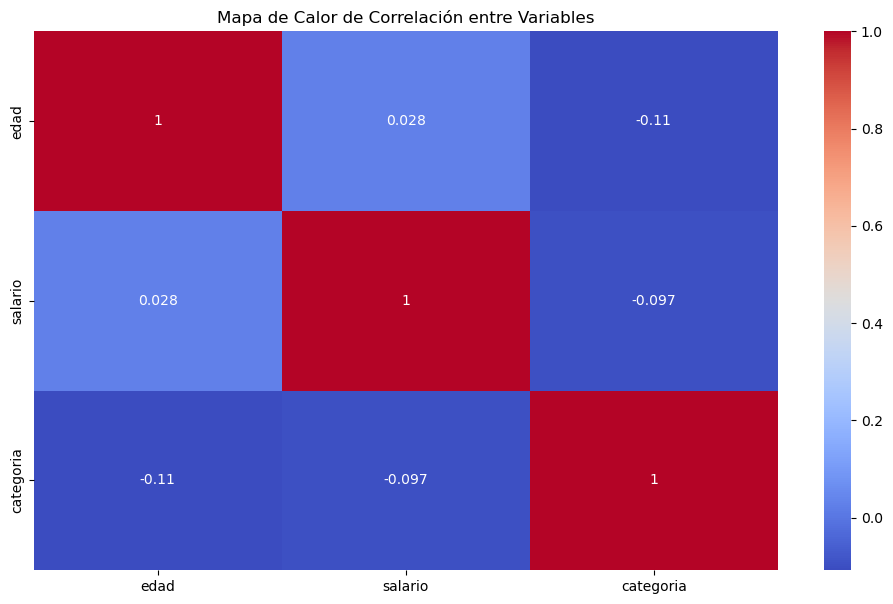

In [51]:
#Visualizacion 2: Mapa de calor de correlacion entre variables
plt.figure(figsize=(12,7))

#calculamos la matriz de correlacion
correlation_matrix= df[['edad','salario','categoria']].corr()
heatmap = sns.heatmap(correlation_matrix,
                     annot=True,
                     cmap='coolwarm')
heatmap.set(title='Mapa de Calor de Correlación entre Variables');